In [5]:
# Import the libraries
import fastai.vision as vs
from fastai.metrics import error_rate

In [6]:
# define batch size
bs=64

In [7]:
help(vs.untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



URLs class contains web addresses for several datasets that are also available in the FAST_AI course v3 

In [8]:
help(vs.URLs.PETS)

No Python documentation found for 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [9]:
path = vs.URLs.PETS

In [10]:
data = vs.untar_data(path)

Basically, untar_data generates a path to the desired dataset

In [11]:
data

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [12]:
path_ann = data/'annotations'
path_img = data/'images'

In [13]:
data.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images')]

In [14]:
# get_image_files : Take the path and return path of all the image type files.
img = vs.get_image_files(path_img)

img[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_165.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/chihuahua_123.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/shiba_inu_207.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/newfoundland_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Sphynx_252.jpg')]

In [15]:
import numpy as np
np.random.seed(1)


In [16]:
# Regex for the extraction of the label from the file name.
pat = r'/([^/]+)_\d+.jpg$'

In [17]:
pat

'/([^/]+)_\\d+.jpg$'

In [20]:
# The ImageDAtaBunch object contains both the images and their corresponding labels.
data = vs.ImageDataBunch.from_name_re(path=path_img,fnames=img,pat=pat,ds_tfms=vs.get_transforms(), size=224, bs=bs)

In [21]:
type(data)

fastai.vision.data.ImageDataBunch

In [26]:
data =data.normalize(vs.imagenet_stats)

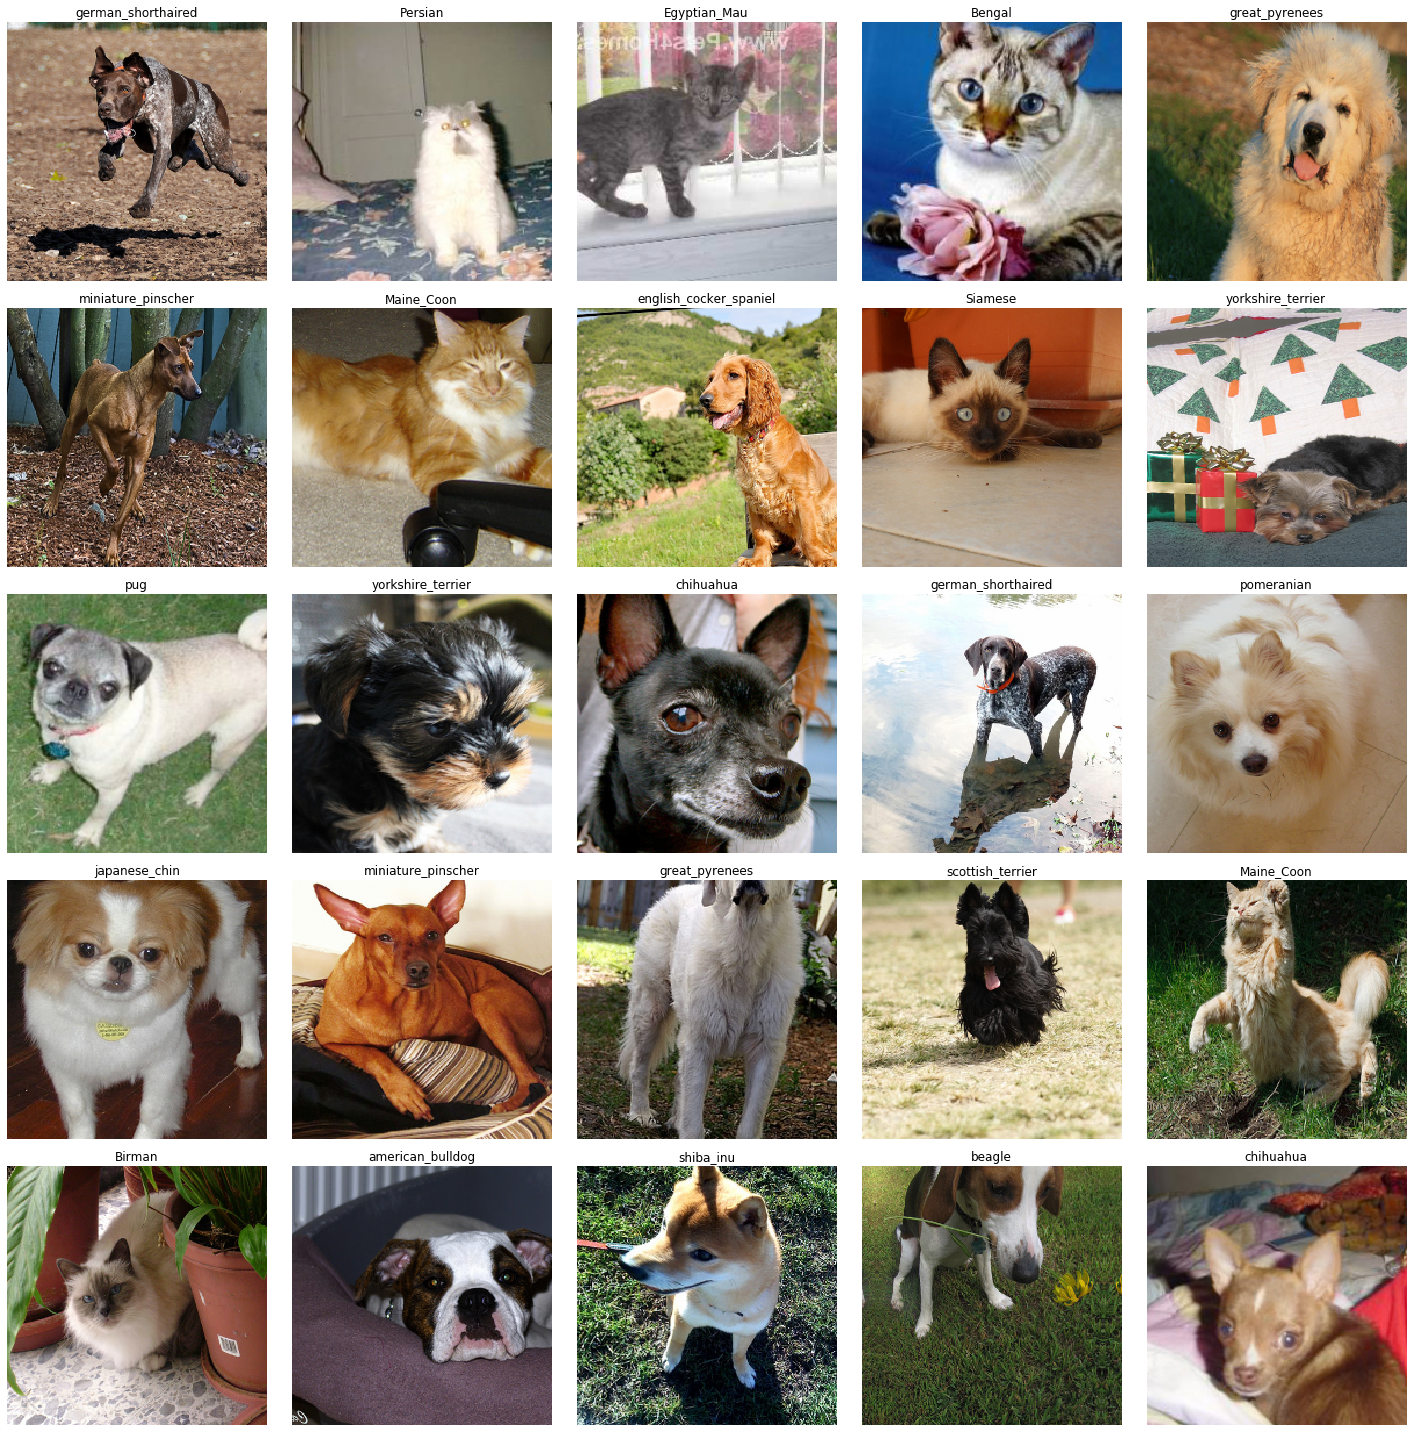

In [27]:
data.show_batch() # to print sample data

In [28]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [29]:
len(data.classes)

37

In [30]:
# create a learning object 

learn_object = vs.cnn_learner(data=data,base_arch=vs.models.resnet34,metrics=error_rate)

In [31]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
type(vs.models.resnet34)

function

In [33]:
?vs.models.resnet34

Signature: vs.models.resnet34(pretrained=False, progress=True, **kwargs)
Docstring:
ResNet-34 model from
`"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

Args:
    pretrained (bool): If True, returns a model pre-trained on ImageNet
    progress (bool): If True, displays a progress bar of the download to stderr
File:      /opt/anaconda3/lib/python3.7/site-packages/torchvision/models/resnet.py
Type:      function


In [34]:
learn_object.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [36]:
learn_object.fit_one_cycle(4)

In [38]:
learn_object.save("stage_4epochs")

In [40]:
type(vs.ClassificationInterpretation)
?vs.ClassificationInterpretation

Init signature:
vs.ClassificationInterpretation(
    learn: fastai.basic_train.Learner,
    preds: torch.Tensor,
    y_true: torch.Tensor,
    losses: torch.Tensor,
    ds_type: fastai.basic_data.DatasetType = <DatasetType.Valid: 2>,
)
Docstring:      Interpretation methods for classification models.
File:           /opt/anaconda3/lib/python3.7/site-packages/fastai/train.py
Type:           type
Subclasses:     


In [42]:
type(vs.ClassificationInterpretation)
?vs.ClassificationInterpretation.from_learner

Signature:
vs.ClassificationInterpretation.from_learner(
    learn: fastai.basic_train.Learner,
    ds_type: fastai.basic_data.DatasetType = <DatasetType.Valid: 2>,
    activ: torch.nn.modules.module.Module = None,
    tta=False,
)
Docstring: Create an instance of `ClassificationInterpretation`. `tta` indicates if we want to use Test Time Augmentation.
File:      /opt/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py
Type:      method


In [43]:
interpretation_object = vs.ClassificationInterpretation.from_learner(learn_object)

In [44]:
losses,indexes = interpretation_object.top_losses()

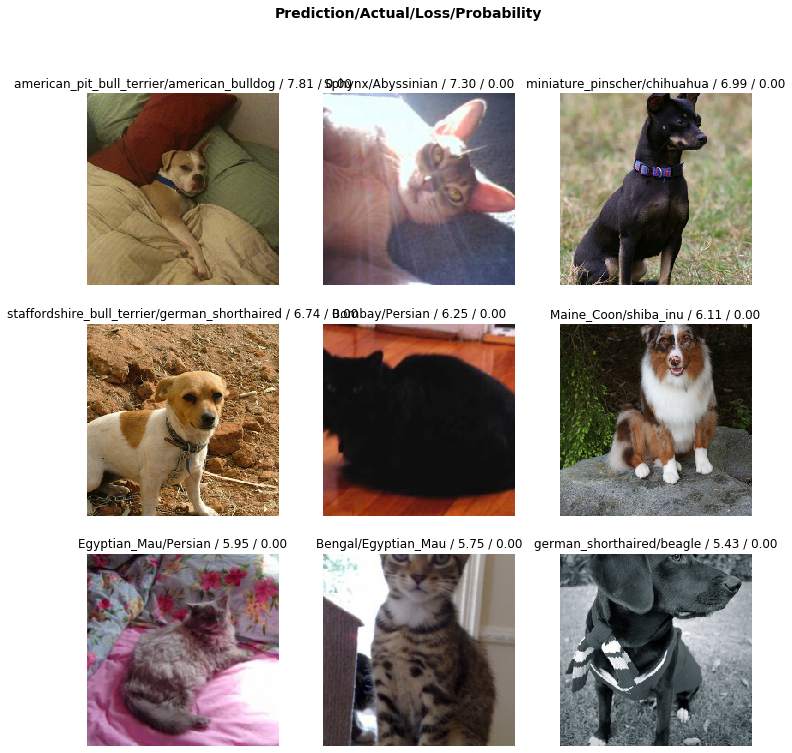

In [47]:
interpretation_object.plot_top_losses(9)

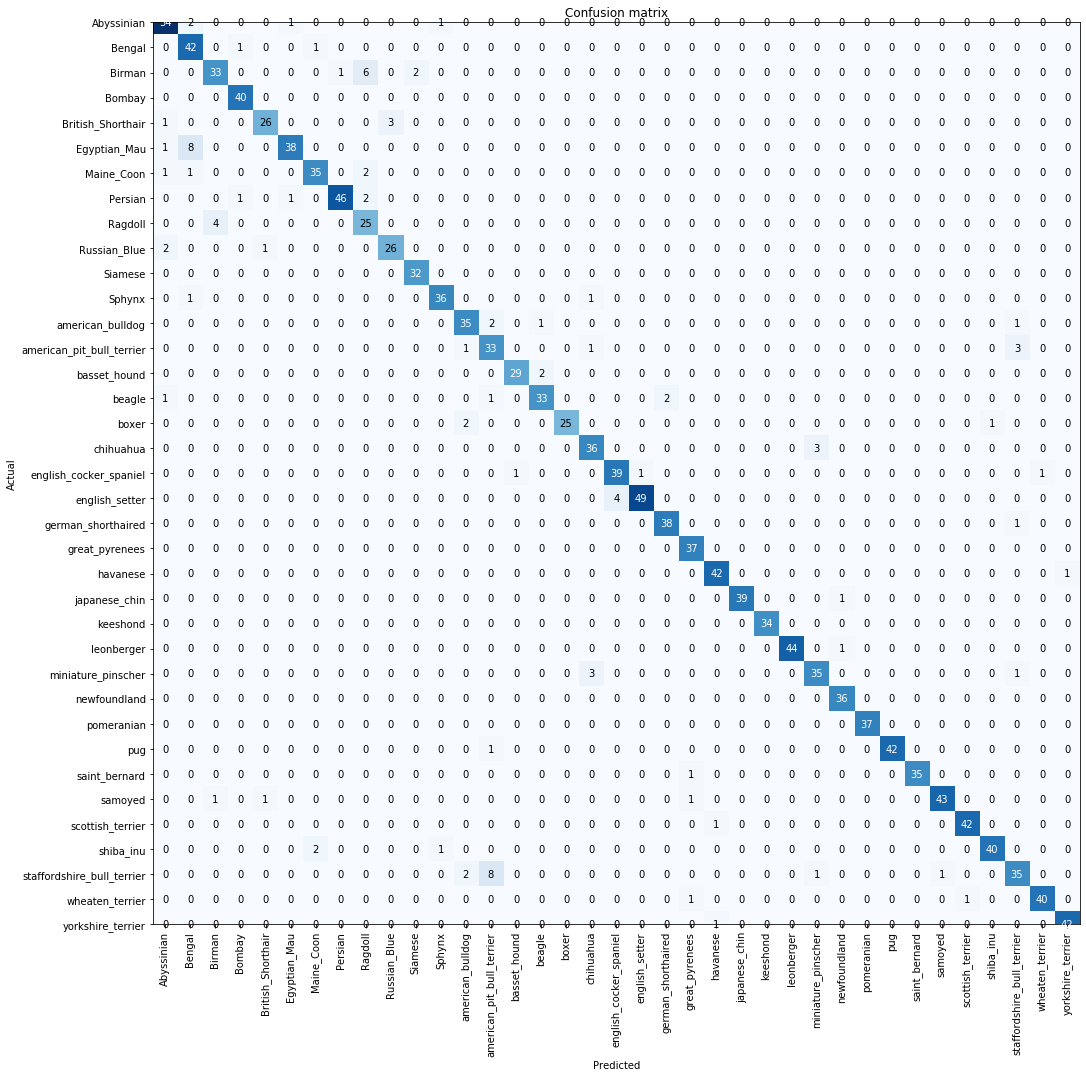

In [54]:
#plot confusion matrix in form of a heatmap

interpretation_object.plot_confusion_matrix(figsize=(15,15))

In [57]:
# finding the most confusing happenings
?interpretation_object.most_confused

Signature: interpretation_object.most_confused(min_val: int = 1, slice_size: int = 1) -> Collection[Tuple[str, str, int]]
Docstring: Sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences.
File:      /opt/anaconda3/lib/python3.7/site-packages/fastai/train.py
Type:      method


In [58]:
interpretation_object.most_confused(2)

[('Egyptian_Mau', 'Bengal', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('Birman', 'Ragdoll', 6),
 ('Ragdoll', 'Birman', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'german_shorthaired', 2),
 ('boxer', 'american_bulldog', 2),
 ('shiba_inu', 'Maine_Coon', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [59]:
# Unfreeze learning object : Train the model from scratch on the data

learn_object.unfreeze()

In [60]:
# Load learning obejct : Bring the model back to its last saved learning stage

learn_object.load('stage_4epochs')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,chihuahua,shiba_inu,newfoundland,Sphynx
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
havanese,leonberger,newfoundland,Egyptian_Mau,Egyptian_Mau
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3)

In [61]:
?learn_object.lr_find

Signature:
learn_object.lr_find(
    start_lr: Union[float, Collection[float]] = 1e-07,
    end_lr: Union[float, Collection[float]] = 10,
    num_it: int = 100,
    stop_div: bool = True,
    wd: float = None,
)
Docstring: Explore lr from `start_lr` to `end_lr` over `num_it` iterations in `learn`. If `stop_div`, stops when loss diverges.
File:      /opt/anaconda3/lib/python3.7/site-packages/fastai/train.py
Type:      method


In [62]:
learn_object.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [63]:
learn_object.recorder?

Type:        Recorder
String form:
Recorder
           learn: Learner(data=ImageDataBunch;
           
           Train: LabelList (5912 items)
           x: ImageList
           Image (3 <...> es=512, out_features=37, bias=True)
           )], add_time=True, silent=False)
           add_time: True
           silent: False
File:        /opt/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py
Docstring:   A `LearnerCallback` that records epoch, loss, opt and metric data during training.


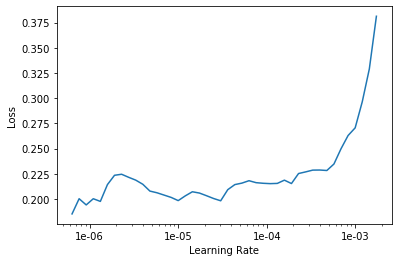

In [64]:
learn_object.recorder.plot()

In [65]:
learn_object.fit_one_cycle(2,max_lr=slice(1e-06,1e-04))

In [70]:
newdata = vs.ImageDataBunch.from_name_re(path_img,img,pat=pat,bs=int(bs/2),ds_tfms=vs.get_transforms(),size=299).normalize(vs.imagenet_stats)

In [72]:
??vs.get_transforms

Signature:
vs.get_transforms(
    do_flip: bool = True,
    flip_vert: bool = False,
    max_rotate: float = 10.0,
    max_zoom: float = 1.1,
    max_lighting: float = 0.2,
    max_warp: float = 0.2,
    p_affine: float = 0.75,
    p_lighting: float = 0.75,
    xtra_tfms: Union[Collection[fastai.vision.image.Transform], NoneType] = None,
) -> Collection[fastai.vision.image.Transform]
Source:   
def get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10., max_zoom:float=1.1,
                   max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75,
                   p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None)->Collection[Transform]:
    "Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms."
    res = [rand_crop()]
    if do_flip:    res.append(dihedral_affine() if flip_vert else flip_lr(p=0.5))
    if max_warp:   res.append(symmetric_warp(magnitude=(-max_warp,max_warp), p=p_affine))
    if max_

In [74]:
new_learner = vs.cnn_learner(newdata,base_arch=vs.models.resnet50, metrics = error_rate)

In [75]:
new_learner.fit_one_cycle(4)

In [76]:
new_learner.save("stage_4epochs_resnet50")

In [77]:
new_learner.unfreeze()
new_learner.fit_one_cycle(1)

In [78]:
new_learner.load('stage_4epochs_resnet50')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Bengal,chihuahua,shiba_inu,newfoundland,Sphynx
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
chihuahua,Bengal,scottish_terrier,havanese,wheaten_terrier
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


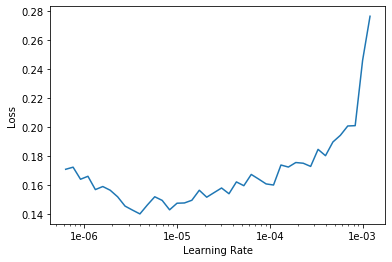

In [80]:
new_learner.lr_find()
new_learner.recorder.plot()

In [81]:
new_learner.fit_one_cycle(2,max_lr=slice(1e-06,1e-04))

In [82]:
new_interpreter = vs.ClassificationInterpretation.from_learner(new_learner)

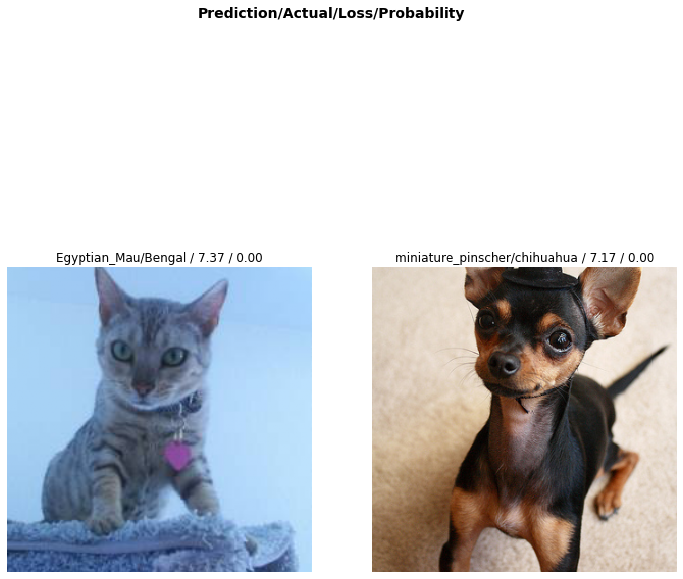

In [84]:
new_interpreter.plot_top_losses(2)

In [85]:
new_interpreter.most_confused(2)

[('Ragdoll', 'Birman', 7),
 ('Bengal', 'Abyssinian', 4),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('boxer', 'staffordshire_bull_terrier', 3),
 ('Abyssinian', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]